In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from prettytable import PrettyTable
%matplotlib inline

In [2]:
a=random.sample(range(10, 100), 50)
b=random.sample(range(10, 100), 50)
c=random.sample(range(-100, -10), 50)
d=random.sample(range(-100, -10), 50)

In [3]:
feat_1_pos=list(a)
feat_1_pos.extend(list(c))

In [4]:
feat_2_pos=list(b)
feat_2_pos.extend(list(d))

In [5]:
pos_df=pd.DataFrame(columns=['feat_1','feat_2','label'])

In [6]:
pos_df['feat_1']=feat_1_pos
pos_df['feat_2']=feat_2_pos
pos_df['label']=[1 for i in range(0,100)]

In [7]:
feat_1_neg=list(c)
feat_1_neg.extend(list(a))
feat_2_neg=list(b)
feat_2_neg.extend(list(d))

In [8]:
neg_df=pd.DataFrame(columns=['feat_1','feat_2','label'])

In [9]:
neg_df['feat_1']=feat_1_neg
neg_df['feat_2']=feat_2_neg
neg_df['label']=[0 for i in range(0,100)]

In [10]:
df=pd.concat([pos_df,neg_df])

In [11]:
import seaborn as sns

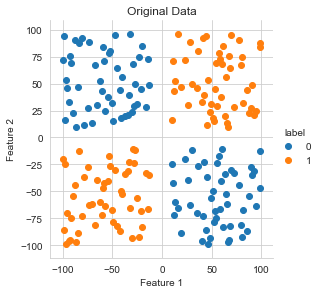

In [12]:
plt.close()
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="label", size=4) \
   .map(plt.scatter, "feat_1", "feat_2") \
   .add_legend();
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.show();

In [13]:
#Hyperparameter C
c=[0.00001,0.0001,0.001,0.1,1,\
       10,100,1000]

In [14]:
c_dict={'C':c}
#Here I am using L2 regularization
lr=LogisticRegression(penalty='l2',random_state=2)
gs5=GridSearchCV(lr,param_grid=c_dict,scoring='roc_auc',cv=5)

In [15]:
X_train, X_test, y_train, y_test=train_test_split(df.drop(columns='label'), df['label'], test_size=0.25, stratify=df['label'],random_state=2)

In [16]:
gs5.fit(X_train,y_train)
print(gs5.best_params_)
print(gs5.best_score_)

{'C': 0.1}
0.4008888888888889


In [17]:
df['feat_1_new']=df['feat_1'] * df['feat_2']
df['feat_2_new']=df['feat_2']

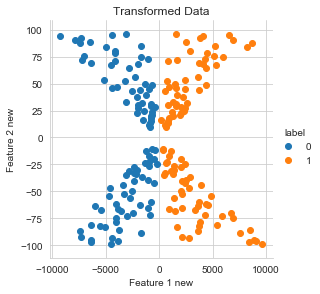

In [18]:
plt.close()
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="label", size=4) \
   .map(plt.scatter, "feat_1_new", "feat_2_new") \
   .add_legend();
plt.xlabel('Feature 1 new')
plt.ylabel('Feature 2 new')
plt.title('Transformed Data')
plt.show();

In [19]:
X_train, X_test, y_train, y_test=train_test_split(df.drop(columns=['label','feat_1','feat_2']),\
                                                  df['label'], test_size=0.25, stratify=df['label'],random_state=2)

In [20]:
gs5.fit(X_train,y_train)
print(gs5.best_params_)
print(gs5.best_score_)

{'C': 1e-05}
1.0


In [21]:
x = PrettyTable()

In [22]:
x.field_names = ["Model","Hyperparameter:C","ROC AUC"]
x.add_row(["Logistic Regression without Feature Engineering",0.00001,0.31])
x.add_row(["Logistic Regression with Feature Engineering",0.00001,1])

In [23]:
print(x)

+-------------------------------------------------+------------------+---------+
|                      Model                      | Hyperparameter:C | ROC AUC |
+-------------------------------------------------+------------------+---------+
| Logistic Regression without Feature Engineering |      1e-05       |   0.31  |
|   Logistic Regression with Feature Engineering  |      1e-05       |    1    |
+-------------------------------------------------+------------------+---------+
